# Inference Analysis

This notebook contains the inference analysis of a survey conducted annually in the United States (National Health and Nutrition Examination Survey).

### This Inference analysis is organized as follows: 

1. <a href='#number_1'> Problem Framing </a>
2. <a href='#number_2'> Database </a>
3. <a href='#number_3'> Data Processing </a>
4. <a href='#number_4'> Exploratory Data Analysis (EDA) - Univariate Analysis </a>
5. <a href='#number_5'> Exploratory Data Analysis (EDA) - Bivariate Analysis + Statistical hypothesis testing </a>
6. <a href='#number_6'> Statistical Hypothesis Testing </a>
7. <a href='#number_7'> Aspects of Analysis </a>

<a id='number_1'></a>
### 1. Problem Framing
   
In this analysis, we will use data from a survey conducted annually in the United States (National Health and Nutrition Examination Survey) to assess: 

**(1) the profile of individuals (adults over 18 years of age) with depressive symptoms in the US in the period 2005-2006, and**

**(2) whether healthy eating habits diet and physical activity are associated with lower rates of depression in this population.**

Data collected includes demographic, socioeconomic, dietary and health-related issues, with the examination component containing medical, dental, physiological and laboratory tests. The survey examines a sample of approximately 5,000 people each year. In this challenge, we will assume that the data were obtained using a random sample of the population of interest and we will use usual techniques and analysis tools for random samples for didactic purposes.

### 2. Database
<a id='number_2'></a>

In [38]:
# importing the libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
# Importing the data
demo = pd.read_csv("DEMO_PHQ.csv")
pag_hei = pd.read_csv("PAG_HEI.csv")

<a id='number_3'></a>
### 3. Data Processing

In [8]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [7]:
demo.head()

SEQN  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
0  31130     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  31131     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2  31132     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3  31134     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4  31139     0.0     0.0     0.0     0.0     3.0     1.0     0.0     0.0   

   DPQ090  RIAGENDR  RIDAGEYR  RIDRETH1  DMDEDUC  INDFMINC  
0     NaN         2        85         3        4       4.0  
1     0.0         2        44         4        4      11.0  
2     0.0         1        70         3        5      11.0  
3     0.0         1        73         3        3      12.0  
4     0.0         2        18         2        3      11.0

In [9]:
pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

#### Combining the database

In [10]:
db = demo.merge(pag_hei, on = 'SEQN', how = 'left')
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

#### Treatment of variables

Evaluating the percentage of missing cases:

In [12]:
db.isnull().mean().round(4)*100

SEQN                        0.00
DPQ010                      9.34
DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
RIAGENDR                    0.00
RIDAGEYR                    0.00
RIDRETH1                    0.00
DMDEDUC                     0.00
INDFMINC                    0.88
PAG_MINW                    0.00
ADHERENCE                   0.00
HEI2015C1_TOTALVEG          5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C7_TOTPROT           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015_TO

#### Summary measures of quantitative variables:

In [14]:
db.drop(columns=['SEQN']).describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

DPQ010   DPQ020   DPQ030   DPQ040   DPQ050   DPQ060   DPQ070   DPQ080  \
count  4836.00  4836.00  4836.00  4836.00  4836.00  4836.00  4836.00  4836.00   
mean      0.31     0.31     0.55     0.72     0.32     0.21     0.23     0.15   
std       0.76     0.71     0.93     0.91     0.74     0.62     0.64     0.59   
min       0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
25%       0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
50%       0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
75%       0.00     0.00     1.00     1.00     0.00     0.00     0.00     0.00   
95%       2.00     2.00     3.00     3.00     2.00     1.00     1.00     1.00   
99%       3.00     3.00     3.00     3.00     3.00     3.00     3.00     3.00   
max       9.00     9.00     9.00     9.00     9.00     9.00     9.00     9.00   

        DPQ090  RIAGENDR  ...  HEI2015C5_WHOLEGRAIN  HEI2015C6_TOTALDAIRY  \
count  4836.00   5334.00  ...               5060.00               5060.00   
mean      0.05      1.52  ...                  1.76                  3.76   
std       0.33      0.50  ...                  1.92                  1.61   
min       0.00      1.00  ...                  0.00                  0.00   
25%       0.00      1.00  ...                  0.00                  2.59   
50%       0.00      2.00  ...                  1.03                  4.94   
75%       0.00      2.00  ...                  3.41                  5.00   
95%       0.00      2.00  ...                  5.00                  5.00   
99%       1.00      2.00  ...                  5.00                  5.00   
max       9.00      2.00  ...                  5.00                  5.00   

       HEI2015C7_TOTPROT  HEI2015C8_SEAPLANT_PROT  HEI2015C9_FATTYACID  \
count            5060.00                  5060.00              5060.00   
mean                4.43                     2.59                 4.71   
std                 1.01                     2.17                 3.24   
min                 0.00                     0.00                 0.00   
25%                 4.17                     0.00                 2.02   
50%                 5.00                     2.59                 4.43   
75%                 5.00                     5.00                 7.27   
95%                 5.00                     5.00                10.00   
99%                 5.00                     5.00                10.00   
max                 5.00                     5.00                10.00   

       HEI2015C10_SODIUM  HEI2015C11_REFINEDGRAIN  HEI2015C12_SFAT  \
count            5060.00                  5060.00          5060.00   
mean                4.76                     5.80             6.07   
std                 3.42                     3.50             3.18   
min                 0.00                     0.00             0.00   
25%                 1.59                     2.93             3.70   
50%                 4.83                     6.23             6.41   
75%                 7.65                     9.25             9.00   
95%                10.00                    10.00            10.00   
99%                10.00                    10.00            10.00   
max                10.00                    10.00            10.00   

       HEI2015C13_ADDSUG  HEI2015_TOTAL_SCORE  
count            5060.00              5060.00  
mean                6.22                49.97  
std                 3.33                12.32  
min                 0.00                16.06  
25%                 3.72                41.03  
50%                 6.86                49.51  
75%                 9.45                58.17  
95%                10.00                71.19  
99%                10.00                79.86  
max                10.00                89.53  

[10 rows x 30 columns]

#### Evaluating frequencies of qualitative variables:


Distribution of scores for PHQ9m

In [17]:
db[[
"DPQ010",
"DPQ020",
"DPQ030",
"DPQ040",
"DPQ050",
"DPQ060",
"DPQ070",
"DPQ080",
"DPQ090"]].agg(['value_counts'])

DPQ010       DPQ020       DPQ030       DPQ040       DPQ050  \
    value_counts value_counts value_counts value_counts value_counts   
0.0         3850         3769         3152         2429         3813   
1.0          673          769         1071         1706          691   
2.0          180          179          286          370          160   
3.0          124          114          320          326          168   
9.0            9            5            7            5            4   

          DPQ060       DPQ070       DPQ080       DPQ090  
    value_counts value_counts value_counts value_counts  
0.0         4134         4070         4362         4667  
1.0          513          545          341          122  
2.0           95          118           79           32  
3.0           89           99           45           13  
9.0            5            4            9            2

Distribution of racial identity:

In [18]:
db[["RIDRETH1"]].value_counts(sort = False)

# RIDRETH1 com códigos errados no desafio
# 1	Mexican American	
# 2	Other Hispanic
# 3	Non-Hispanic White	
# 4	Non-Hispanic Black	
# 5	Other Race - Including Multi-Racial

RIDRETH1
1           1133
2            164
3           2516
4           1300
5            221
dtype: int64

Distribution of schooling:

In [20]:
db[["DMDEDUC"]].value_counts(sort = False)
# 1 = Menor que 9o ano
# 2 = 9-12o ano
# 3 = Ensino médio
# 4 = Ensino superior incompleto
# 5 = Superior completo ou maior
# 7 = Se recusou a responder
# 9 = Não sabe

DMDEDUC
1           618
2           936
3          1335
4          1498
5           939
7             4
9             4
dtype: int64

Income distribution:


In [21]:
db[["INDFMINC"]].value_counts(sort = False)
# 1 = 0-4999
# 2 - 5000-9999
# 3 = 10000-14999
# 4 = 15000-19999
# 5 = 20000-24999
# 6 = 25000-34999
# 7 = 35000-44999
# 8 = 45000-54999
# 9 = 55000-64999
# 10 = 65000-74999
# 11 = Maior ou igual a 75000
# 12 = Maior que 20000
# 13 = Menor que 20000
# 77 = Se recusou a responder
# 99 = Não sabe

INDFMINC
1.0          190
2.0          281
3.0          440
4.0          412
5.0          426
6.0          678
7.0          535
8.0          485
9.0          297
10.0         278
11.0        1044
12.0          78
13.0          30
77.0          36
99.0          77
dtype: int64

Adherence group distribution:


In [22]:
db[["ADHERENCE"]].value_counts(sort = False)

# 1 = Baixo (< 150 min/semana)
# 2 = Adequado (150-300 min/semana)
# 3 = Acima (> 300 min/semana)

ADHERENCE
1.0          2304
2.0           834
3.0          2196
dtype: int64

#### Grouping/recategorizing qualitative variables:

1) Replacing categories 7 and 9 with missing for variables DPQ0X0 and DMDEDUC

2) Grouping categories 2 and 5 in variable RIDRETH1

3) Recategorizing the INDMINC variable with the midpoint of each category because it contains many categories in this variable. We will continue the analysis of this variable as a quantitative variable

In [24]:
replace_map = {
  "DPQ010": {7: np.nan, 9: np.nan},
  "DPQ020": {7: np.nan, 9: np.nan},
  "DPQ030": {7: np.nan, 9: np.nan},
  "DPQ040": {7: np.nan, 9: np.nan},
  "DPQ050": {7: np.nan, 9: np.nan},
  "DPQ060": {7: np.nan, 9: np.nan},
  "DPQ070": {7: np.nan, 9: np.nan},
  "DPQ080": {7: np.nan, 9: np.nan},
  "DPQ090": {7: np.nan, 9: np.nan},
  "RIDRETH1": {5: 2}, # Other
  "DMDEDUC": {7: np.nan, 9: np.nan},
  "INDFMINC": {1: np.mean([0,4999]), 2: np.mean([5000,9999]), 3: np.mean([10000,14999]),4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),6: np.mean([25000,34999]), 7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 10: np.mean([65000,74999]), 11: 75000, 12: np.mean([20000, 90000]), 13: np.mean([0, 19999]),
               77: np.nan, 99: np.nan}
}

db2 = db.replace(replace_map)


#### Construction of variables

Checking missing cases for phq9 variables:

In [26]:
db2[["DPQ010", 
     "DPQ020", 
     "DPQ030", 
     "DPQ040",
     "DPQ050", 
     "DPQ060", 
     "DPQ070", 
     "DPQ080", 
     "DPQ090"]].isnull().mean()

DPQ010    0.095051
DPQ020    0.094301
DPQ030    0.094676
DPQ040    0.094301
DPQ050    0.094113
DPQ060    0.094301
DPQ070    0.094113
DPQ080    0.095051
DPQ090    0.093738
dtype: float64

Building variable phq9:

In [27]:
db2["phq9"] = db2[["DPQ010", 
                   "DPQ020", 
                   "DPQ030", 
                   "DPQ040", 
                   "DPQ050", 
                   "DPQ060", 
                   "DPQ070", 
                   "DPQ080", 
                   "DPQ090"]].sum(axis = 'columns', skipna = False)

db2[["DPQ010", 
     "DPQ020", 
     "DPQ030", 
     "DPQ040",
     "DPQ050", 
     "DPQ060", 
     "DPQ070", 
     "DPQ080", 
     "DPQ090",
     "phq9"]].head()

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     3.0     1.0     0.0     0.0     0.0   

   phq9  
0   NaN  
1   0.0  
2   0.0  
3   0.0  
4   4.0

Building phq_grp variable:

In [29]:
conditions = [
  (db2['phq9'].isna()),
  (db2['phq9'] <= 5),
  (db2['phq9'] > 5) & (db2['phq9'] <= 9),
  (db2['phq9'] > 9) & (db2['phq9'] <= 14),
  (db2['phq9'] > 14) & (db2['phq9'] <= 19),
  (db2['phq9'] > 19)
    ]
values = [np.nan, 0, 1, 2, 3, 4]

db2["phq_grp"] = np.select(conditions, values) # Construindo variável

db2[["phq_grp"]].value_counts(sort = False) # Evaluating frequency


phq_grp
0.0        4013
1.0         489
2.0         201
3.0          73
4.0          23
dtype: int64

We can build new variables from the phq_grp variable:


In [30]:
# Grouping phq_grp into 0 = No symptoms, 1 = Mild symptoms, 2 = Moderate to severe symptoms

db2["phq_grp2"] = db2["phq_grp"].replace([3, 4], 2)

db2[["phq_grp2"]].value_counts(sort = False) # Evaluating frequency

phq_grp2
0.0         4013
1.0          489
2.0          297
dtype: int64

#### 1) For the exploratory analysis and hypothesis testing stages, we will use the variable phq_grp2 with 3 levels of depression symptoms.

#### 2) As the percentage of missing is below 10% for all variables, we will continue the analysis using only complete data.

<a id='number_4'></a>
### 4. Exploratory Data Analysis (EDA) - Univariate Analysis

In [31]:
var_quant = [
    "RIDAGEYR", 
    "INDFMINC", 
    "PAG_MINW", 
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq9"]

var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_grp2"
]

label_quali = {
  "RIAGENDR": {1: 'Masculino', 2: 'Feminino'},
  "RIDRETH1": {1: 'Americano Mexicano', 2: 'Outro', 3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico'},
  "DMDEDUC": {1: "< 9 ano", 2: "9-12 ano", 3: "Ensino \n médio", 4: "Superior \n incompleto", 5: "Superior \n completo"},
  "ADHERENCE": {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
  "phq_grp2": {0: "Sem sintomas", 1: "Sintomas \n leves", 2: "Sintomas \n moderados-severos"}
}

In [32]:
db2[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

RIDAGEYR  INDFMINC  PAG_MINW  HEI2015C1_TOTALVEG  \
count   5334.00   5174.00   5334.00             5060.00   
mean      45.09  40787.68    471.77                3.20   
std       20.15  24247.24    780.35                1.47   
min       18.00   2499.50      0.00                0.00   
25%       27.00  17499.50     35.00                2.06   
50%       43.00  39999.50    210.00                3.22   
75%       62.00  69999.50    568.93                4.83   
95%       81.00  75000.00   1863.05                5.00   
99%       85.00  75000.00   3672.06                5.00   
max       85.00  75000.00  10777.83                5.00   

       HEI2015C2_GREEN_AND_BEAN  HEI2015C3_TOTALFRUIT  HEI2015C4_WHOLEFRUIT  \
count                   5060.00               5060.00               5060.00   
mean                       1.81                  2.49                  2.36   
std                        2.14                  1.95                  2.17   
min                        0.00                  0.00                  0.00   
25%                        0.00                  0.45                  0.00   
50%                        0.06                  2.32                  2.08   
75%                        4.50                  4.94                  5.00   
95%                        5.00                  5.00                  5.00   
99%                        5.00                  5.00                  5.00   
max                        5.00                  5.00                  5.00   

       HEI2015C5_WHOLEGRAIN  HEI2015C6_TOTALDAIRY  HEI2015C7_TOTPROT  \
count               5060.00               5060.00            5060.00   
mean                   1.76                  3.76               4.43   
std                    1.92                  1.61               1.01   
min                    0.00                  0.00               0.00   
25%                    0.00                  2.59               4.17   
50%                    1.03                  4.94               5.00   
75%                    3.41                  5.00               5.00   
95%                    5.00                  5.00               5.00   
99%                    5.00                  5.00               5.00   
max                    5.00                  5.00               5.00   

       HEI2015C8_SEAPLANT_PROT  HEI2015C9_FATTYACID  HEI2015C10_SODIUM  \
count                  5060.00              5060.00            5060.00   
mean                      2.59                 4.71               4.76   
std                       2.17                 3.24               3.42   
min                       0.00                 0.00               0.00   
25%                       0.00                 2.02               1.59   
50%                       2.59                 4.43               4.83   
75%                       5.00                 7.27               7.65   
95%                       5.00                10.00              10.00   
99%                       5.00                10.00              10.00   
max                       5.00                10.00              10.00   

       HEI2015C11_REFINEDGRAIN  HEI2015C12_SFAT  HEI2015C13_ADDSUG  \
count                  5060.00          5060.00            5060.00   
mean                      5.80             6.07               6.22   
std                       3.50             3.18               3.33   
min                       0.00             0.00               0.00   
25%                       2.93             3.70               3.72   
50%                       6.23             6.41               6.86   
75%                       9.25             9.00               9.45   
95%                      10.00            10.00              10.00   
99%                      10.00            10.00              10.00   
max                      10.00            10.00              10.00   

       HEI2015_TOTAL_SCORE     phq9  
count              5060.00  4799.00  
mean                 49.97     2

Since a week has a maximum of 168 hours (10080 minutes) the maximum value of PAG_MINW does not seem to be a possible value. In this case, we will truncate the value of PAG_MINW in 3600 minutes (60h per week).

In [33]:
db2['PAG_MINW_trunc'] = np.where(db2['PAG_MINW'] > 3600, 3600, db2['PAG_MINW'])

db2[['PAG_MINW', 'PAG_MINW_trunc']].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

PAG_MINW  PAG_MINW_trunc
count   5334.00         5334.00
mean     471.77          454.86
std      780.35          663.05
min        0.00            0.00
25%       35.00           35.00
50%      210.00          210.00
75%      568.93          568.93
95%     1863.05         1863.05
99%     3672.06         3600.00
max    10777.83         3600.00

We can transform the PAG_MINW variable into hours:

In [34]:
db2["PAG_HRW"] = db2["PAG_MINW_trunc"]/60

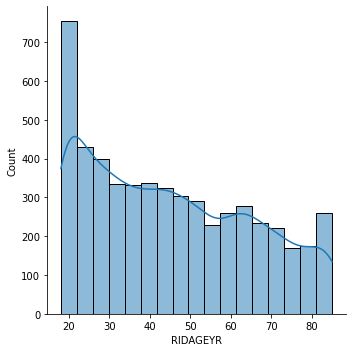

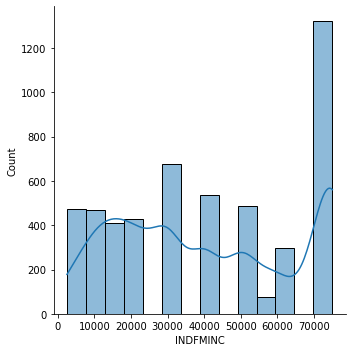

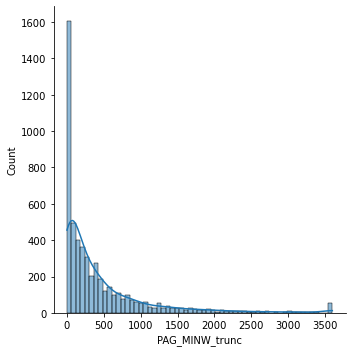

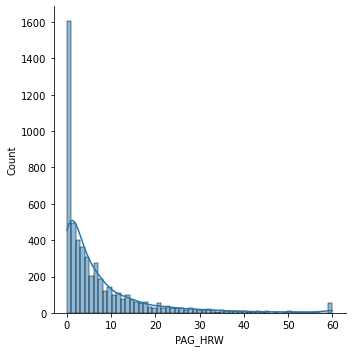

In [39]:
sns.displot(db2, x="RIDAGEYR", kde=True)
sns.displot(db2, x="INDFMINC", kde=True)
sns.displot(db2, x="PAG_MINW_trunc", kde=True)
sns.displot(db2, x="PAG_HRW", kde=True)
plt.show()

As the PAG_HRW variable is quite asymmetric, we can also create a version with the log:

In [40]:
db2["PAG_HRW_log"] = np.log(db2["PAG_HRW"] + 1)

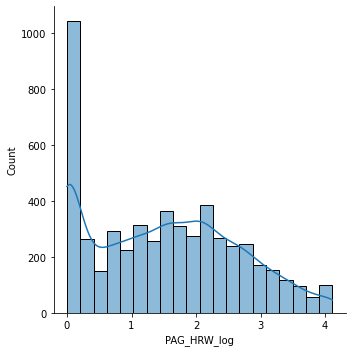

In [41]:
sns.displot(db2, x="PAG_HRW_log", kde=True)
plt.show()

Building function to build bar graphs:

In [45]:
def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.ylim(0,1)
    plt.show()

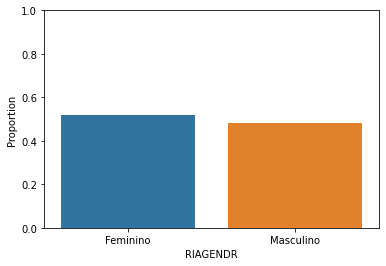

In [43]:
grafico_barras_prop(db2.replace(label_quali), variable = "RIAGENDR")

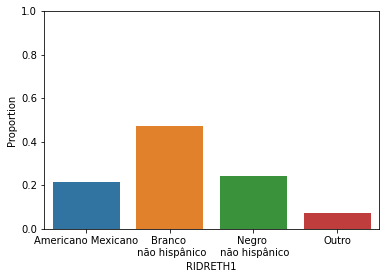

In [44]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "RIDRETH1")

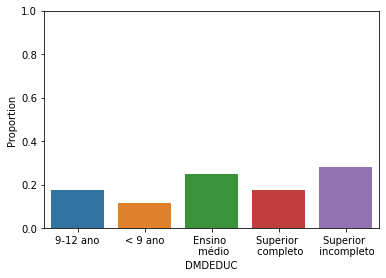

In [46]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "DMDEDUC")

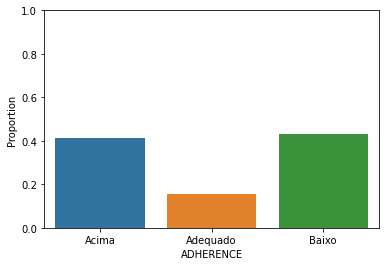

In [47]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "ADHERENCE")

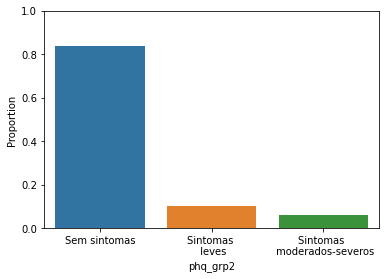

In [48]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "phq_grp2")

<a id='number_5'></a>
### 5. Exploratory Data Analysis (EDA) - Bivariate Analysis + Statistical hypothesis testing

Function to build boxplot plots for a quantitative variable versus depression group

In [54]:
# Função para construir boxplot

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="phq_grp2", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

### A) Profile with higher incidence of symptoms of depression

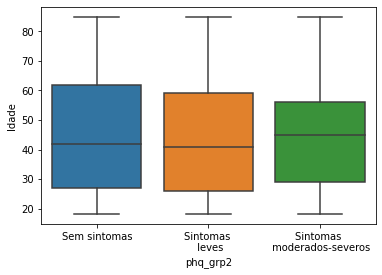

In [51]:
grafico_boxplot_grp(db2.replace(label_quali), "RIDAGEYR", "Idade")

Hypothesis test:

In this case we want to compare the mean age for the three groups of depression symptoms. Therefore, the ANOVA F test will be used. In this test, we decided between the null hypothesis "There is no difference between the depression groups regarding the mean age" and the alternative hypothesis "There is at least one difference in the mean age between the groups of depression symptoms".

In [52]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "RIDAGEYR"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["RIDAGEYR"],
                   db_aux[(db_aux.phq_grp2 == 1)]["RIDAGEYR"],
                   db_aux[(db_aux.phq_grp2 == 2)]["RIDAGEYR"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=1.002, p=0.367


The p-value of the test was p = 0.367. Interpretation of the p-value: If the null hypothesis were true, how likely are we to see the differences that we are seeing in the sample?

In this case, the probability is high (p = 0.367), that is, what we are observing in the sample is something very likely to occur if the null hypothesis is true and, therefore, we have no evidence to reject the null hypothesis. Therefore, we were not able to detect a statistically significant difference between the depression groups regarding the mean age.

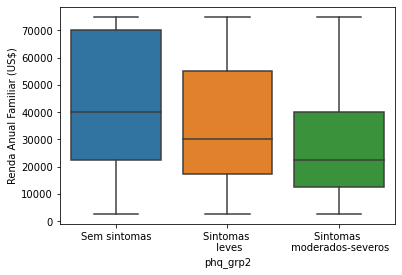

In [53]:
grafico_boxplot_grp(db2.replace(label_quali), "INDFMINC", "Renda Anual Familiar (US$)")

Hypothesis test:

In [55]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "INDFMINC"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["INDFMINC"],
                   db_aux[(db_aux.phq_grp2 == 1)]["INDFMINC"],
                   db_aux[(db_aux.phq_grp2 == 2)]["INDFMINC"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=50.376, p=0.000


In this case we are testing the null hypothesis "There is no difference between depression groups with respect to average income". As p < 0.05, we have that the probability of observing what we are observing in this sample is low (close to zero) if the null hypothesis were true. In this case, we have evidence that the null hypothesis is not true (we reject the null hypothesis).

As the F test only tells us that there is at least one difference between the symptom groups with respect to average income, we will perform multiple comparisons to investigate which differences are significant:

In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['INDFMINC'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   0.0    1.0  -5537.0284 0.001  -8305.9614  -2768.0954   True
   0.0    2.0 -13537.8408 0.001 -16971.2327 -10104.4489   True
   1.0    2.0  -8000.8124 0.001 -12223.0265  -3778.5983   True
--------------------------------------------------------------


With multiple comparisons, we are performing three hypothesis tests **simultaneously**. Because of this, the function adjusts the p-value so that the maximum error from this hypothesis test set is at most alpha = 0.05.

Test 1: Group 0 (No symptoms) x Group 1 (mild symptoms) -> p = 0.001

Test 2: Group 0 (No symptoms) x Group 2 (moderate-severe symptoms) -> p = 0.001

Test 3: Group 1 (mild symptoms) x Group 2 (moderate-severe symptoms) -> p = 0.001

In this case, we reject all null hypotheses. Therefore, we have evidence that:

1. The average income of the No symptoms group is different from the average income of the mild symptoms group
2. The median income of the No symptoms group is different from the median income of the moderate-severe symptoms group
3. The average income of the mild symptoms group is different from the average income of the moderate-severe symptoms group

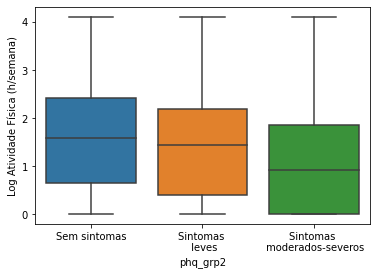

In [57]:
grafico_boxplot_grp(db2.replace(label_quali), "PAG_HRW_log", "Log Atividade Física (h/semana)")

In [58]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "PAG_HRW_log"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["PAG_HRW_log"],
                   db_aux[(db_aux.phq_grp2 == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.phq_grp2 == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=31.185, p=0.000


In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.1483 0.0157 -0.2739 -0.0226   True
   0.0    2.0  -0.5119  0.001 -0.6697 -0.3542   True
   1.0    2.0  -0.3636  0.001 -0.5566 -0.1707   True
----------------------------------------------------


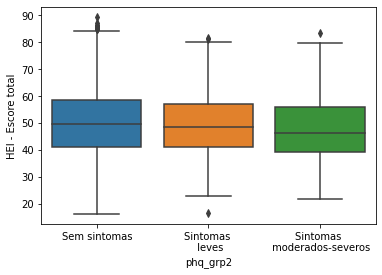

In [60]:
grafico_boxplot_grp(db2.replace(label_quali), "HEI2015_TOTAL_SCORE", "HEI - Escore total")

In [61]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.phq_grp2 == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.phq_grp2 == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=7.119, p=0.001


In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.1066 0.1546 -2.5111  0.2978  False
   0.0    2.0  -2.5846 0.0017  -4.348 -0.8211   True
   1.0    2.0  -1.4779 0.2437 -3.6364  0.6805  False
----------------------------------------------------


### B) Perfil de hábitos saudáveis

Alimentação saudável x Exercícios Físicos

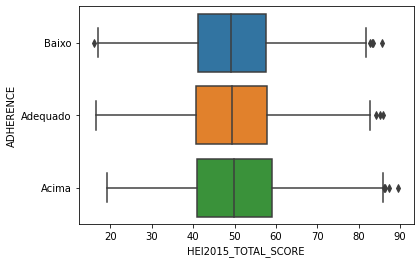

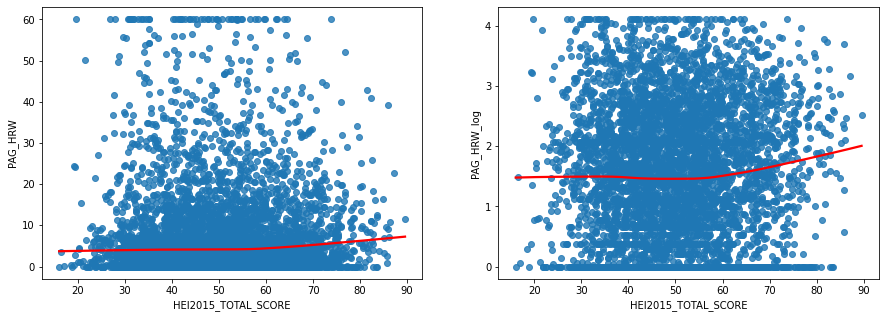

In [63]:
sns.boxplot(y="ADHERENCE", 
            x="HEI2015_TOTAL_SCORE", 
            orient="h",
            data=db2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[0])

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW_log', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[1])
plt.show()

In [64]:
from scipy.stats import f_oneway

db_aux = db2[["ADHERENCE", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.ADHERENCE == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 3)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.122, p=0.016


In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['ADHERENCE'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.3937 0.7031  -0.805 1.5924  False
   1.0    3.0   1.0773  0.012  0.1931 1.9616   True
   2.0    3.0   0.6837  0.378 -0.5186 1.8859  False
---------------------------------------------------


Healthy Habits x Gender


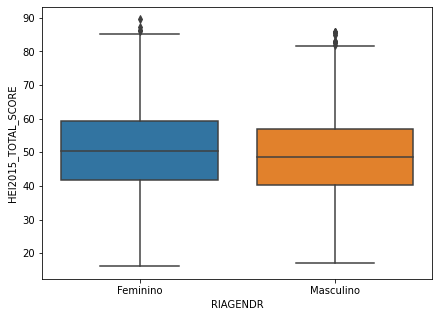

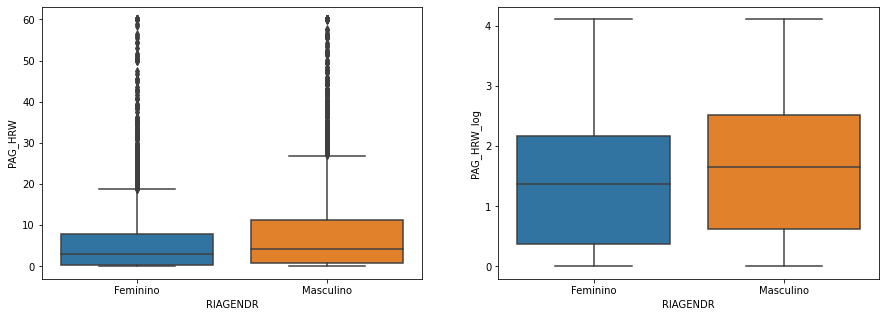

In [66]:
plt.figure(figsize=(7,5))
sns.boxplot(x="RIAGENDR", 
            y="HEI2015_TOTAL_SCORE", 
            data=db2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW", 
            data=db2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW_log", 
            data=db2.replace(label_quali),
            ax = ax[1])
plt.show()

In [67]:
from scipy.stats import f_oneway

db_aux = db2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIAGENDR == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=27.216, p=0.000


In [68]:
from scipy.stats import f_oneway

db_aux = db2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIAGENDR == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=50.329, p=0.000


Healthy habits and racial identity:

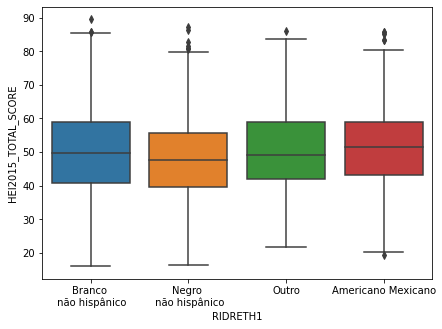

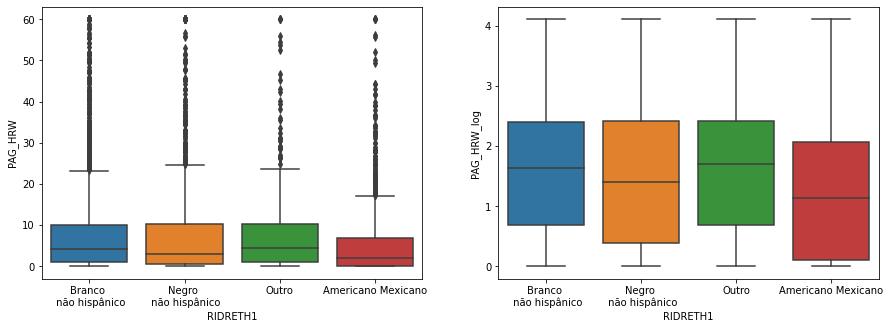

In [69]:
plt.figure(figsize=(7,5))
sns.boxplot(x="RIDRETH1", 
            y="HEI2015_TOTAL_SCORE", 
            data=db2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW", 
            data=db2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW_log", 
            data=db2.replace(label_quali),
            ax = ax[1])
plt.show()

In [70]:
from scipy.stats import f_oneway

db_aux = db2[["RIDRETH1", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=11.860, p=0.000


In [71]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.964  0.556 -2.8709   0.943  False
     1      3  -1.0955 0.0718 -2.2542  0.0632  False
     1      4  -2.9767  0.001 -4.2992 -1.6541   True
     2      3  -0.1315    0.9 -1.8988  1.6357  False
     2      4  -2.0127 0.0302 -3.8914  -0.134   True
     3      4  -1.8812  0.001 -2.9928 -0.7696   True
----------------------------------------------------


In [72]:
from scipy.stats import f_oneway

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=25.845, p=0.000


In [73]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.3757  0.001  0.2016  0.5499   True
     1      3   0.3502  0.001  0.2444   0.456   True
     1      4    0.229  0.001  0.1082  0.3498   True
     2      3  -0.0255    0.9 -0.1869  0.1359  False
     2      4  -0.1467 0.1241 -0.3183  0.0248  False
     3      4  -0.1212 0.0116 -0.2227 -0.0197   True
----------------------------------------------------
